In [1]:
import sys, os
sys.path.insert(0, '../..')
# os.environ["CUDA_VISIBLE_DEVICES"]=""

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')
# matplotlib.rcParams['figure.figsize'] = (40, 20)

In [3]:
DATA_ROOT =  '../../../final_results/'

DATASETS = ('airport/', 'polblog/', 'polbook/', 'small_pokec/', 'pokec/', )
METRICS = ('roc_score', 'sp_score', 'gini_score')

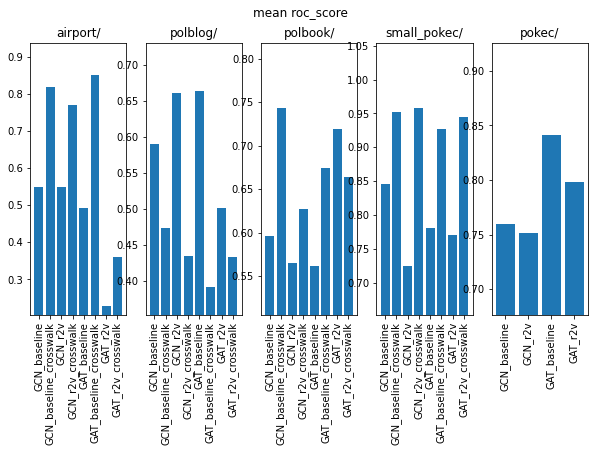

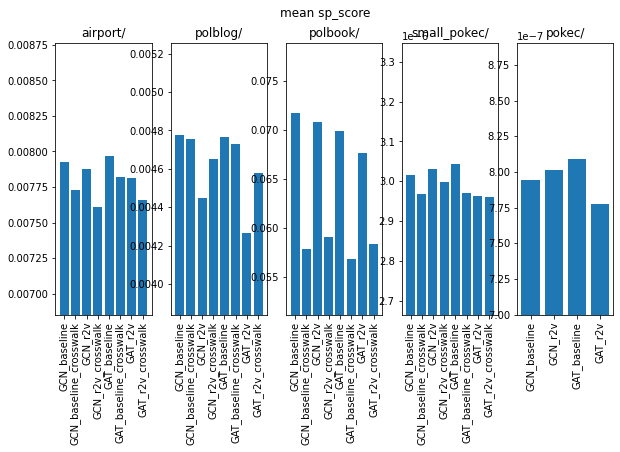

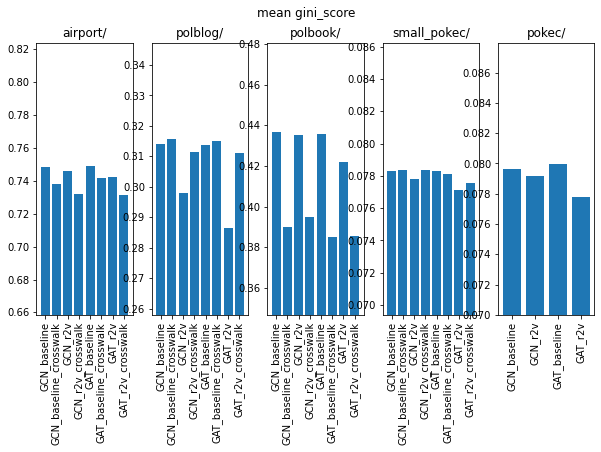

In [4]:
for metric in METRICS:
    n_datasets = len(DATASETS)
        
    f, axes = plt.subplots(1, n_datasets, figsize=(10, 5) )
    f.suptitle("mean " + metric)
    for idx, dataset in enumerate(DATASETS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            if 'word2vec' in m.lower():
                m_dict.pop(m)
        y = np.mean(np.vstack(m_dict.values()), axis=1)
        axes[idx].bar(list(m_dict.keys()), y)
        axes[idx].title.set_text(dataset)
        axes[idx].set_xticklabels(list(m_dict.keys()), rotation=90)
        p10, P10 = np.min(y) * .9, np.max(y) * 1.1
        axes[idx].set_ylim([p10, P10])
    plt.plot()

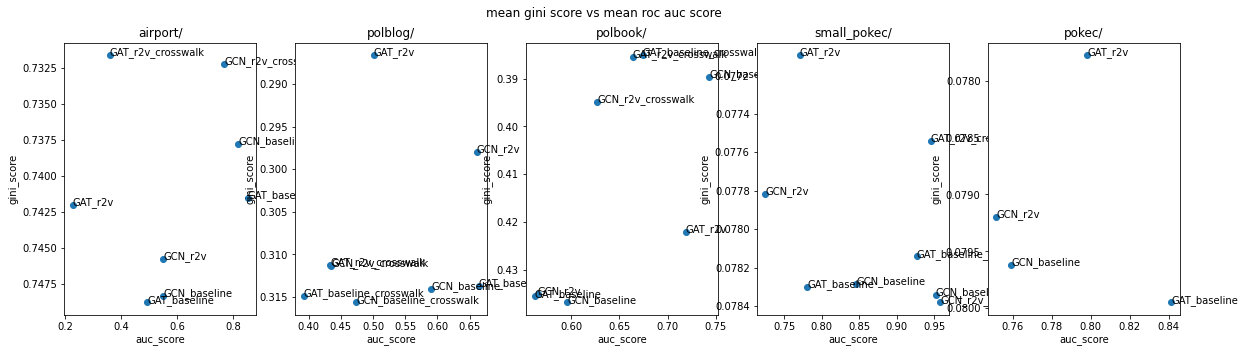

In [5]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean gini score vs mean roc auc score")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    gini_file = DATA_ROOT + dataset + 'gini_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='gini_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    gini = pkl.load(open(gini_file, 'rb'))
    for m in list(roc.keys()):
            if 'word2vec' in m.lower():
                roc.pop(m)
    for m in list(gini.keys()):
            if 'word2vec' in m.lower():
                gini.pop(m)
    combined = {k: (np.mean(roc[k]), np.mean(gini[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


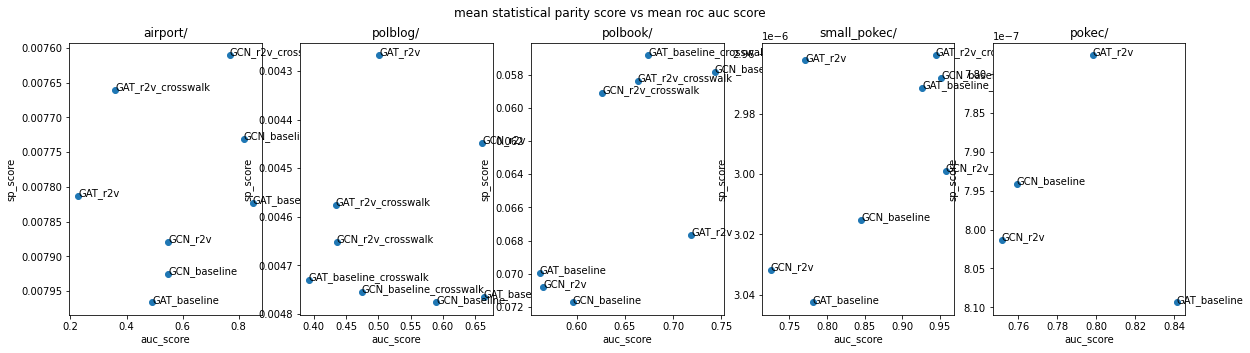

In [6]:
n_datasets = len(DATASETS)
f, axes = plt.subplots(1, n_datasets, figsize=(20, 5) )
f.suptitle("mean statistical parity score vs mean roc auc score")
for idx, dataset in enumerate(DATASETS):
    roc_file = DATA_ROOT + dataset + 'roc_score' + '.pkl'
    sp_file = DATA_ROOT + dataset + 'sp_score' + '.pkl'
    axes[idx].set(title=dataset, xlabel='auc_score', ylabel='sp_score')
    axes[idx].invert_yaxis()
    roc = pkl.load(open(roc_file, 'rb'))
    sp = pkl.load(open(sp_file, 'rb'))
    for m in list(roc.keys()):
            if 'word2vec' in m.lower():
                roc.pop(m)
    for m in list(sp.keys()):
            if 'word2vec' in m.lower():
                sp.pop(m)
    combined = {k: (np.mean(roc[k]), np.mean(sp[k])) for k in roc}
    x, y, names = [i[0] for i in combined.values()], [i[1] for i in combined.values()], [i for i in combined.keys()]
    axes[idx].scatter(x=x, y=y)
    for i, name in enumerate(names): axes[idx].annotate(name, (x[i], y[i]))


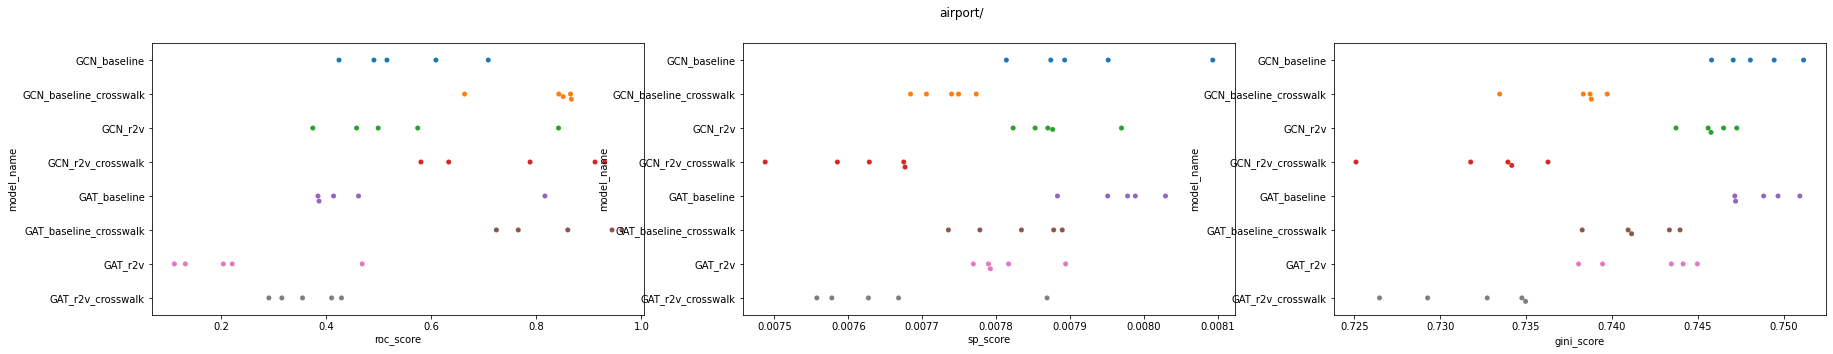

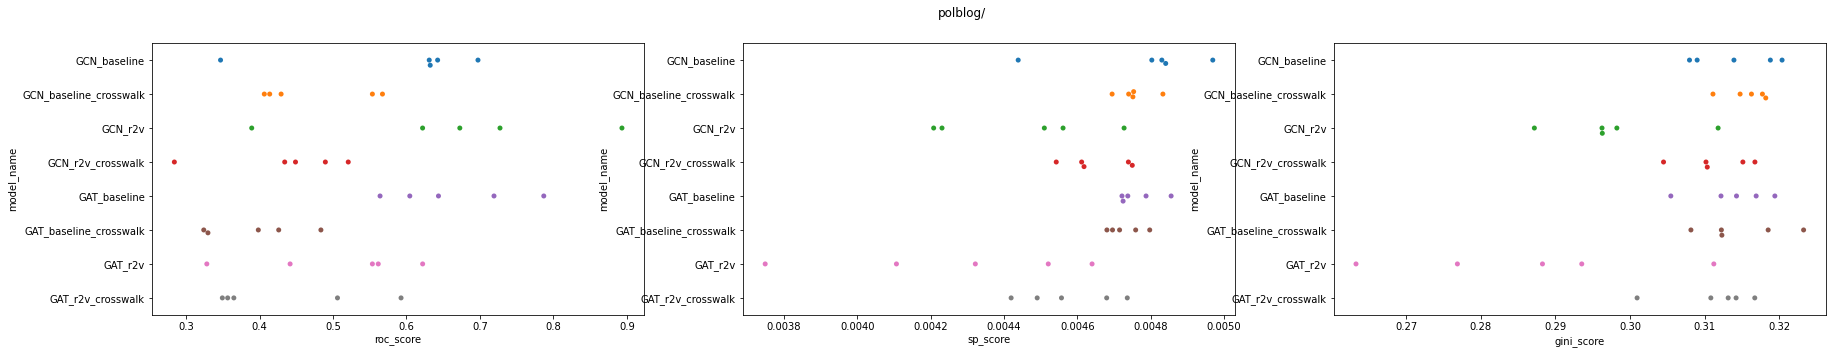

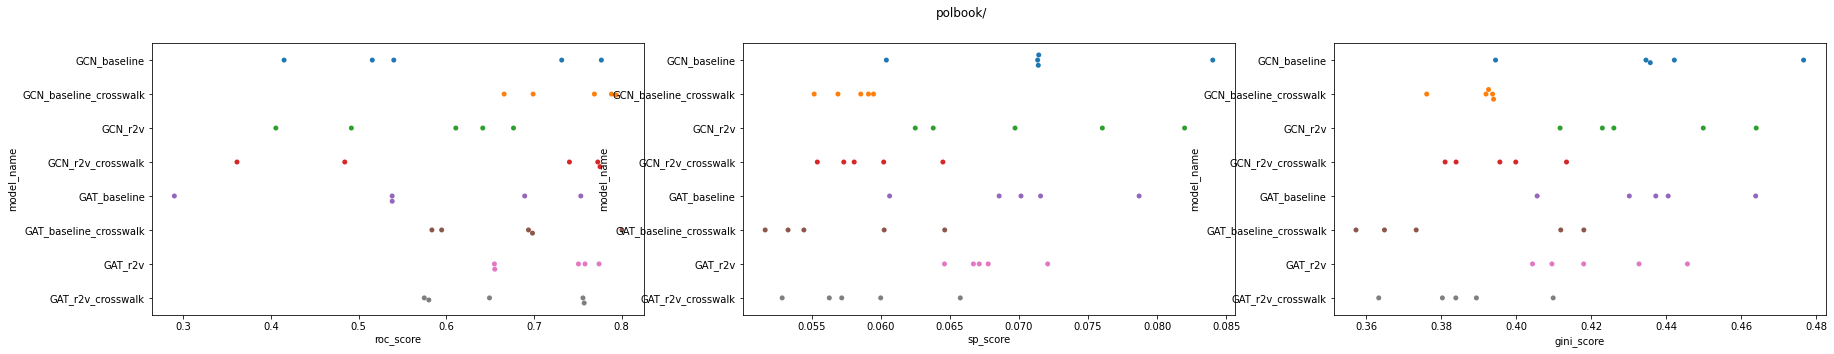

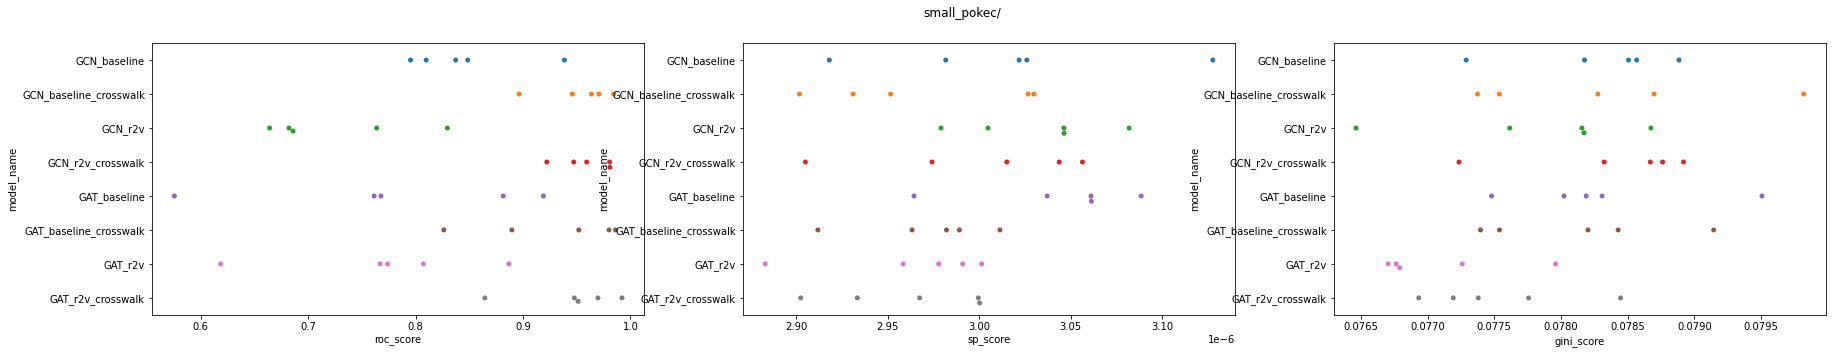

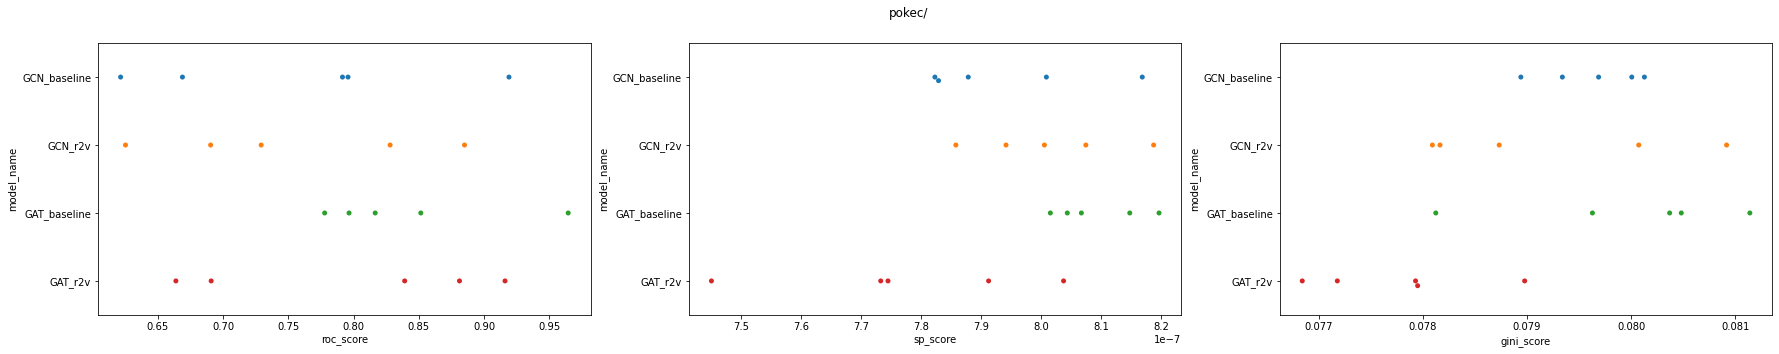

In [7]:
# swarm plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            if 'word2vec' in m.lower():
                m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.swarmplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name', legend=False)
    plt.show()

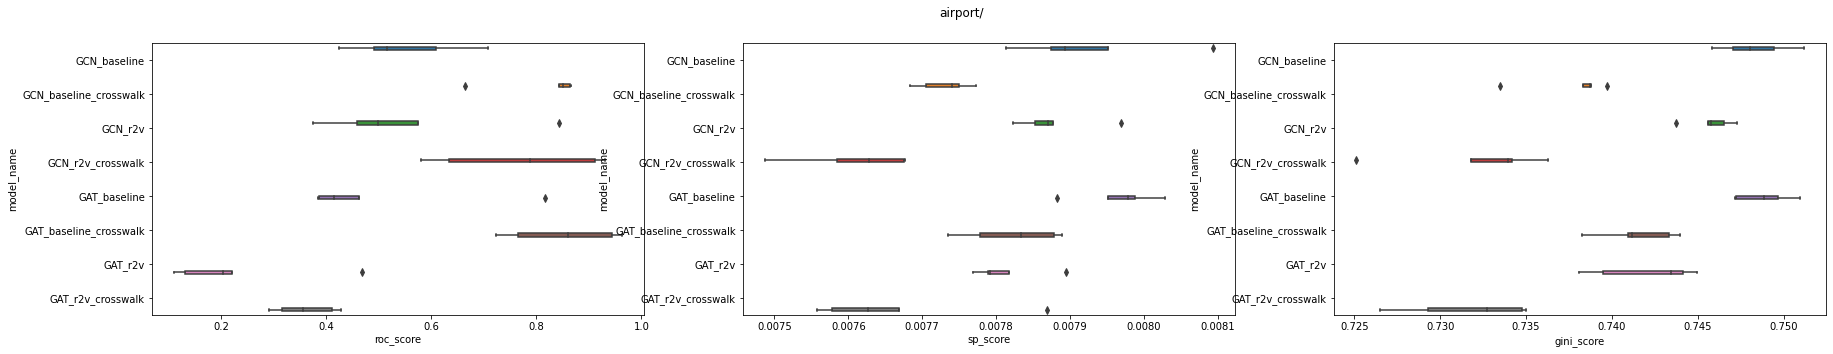

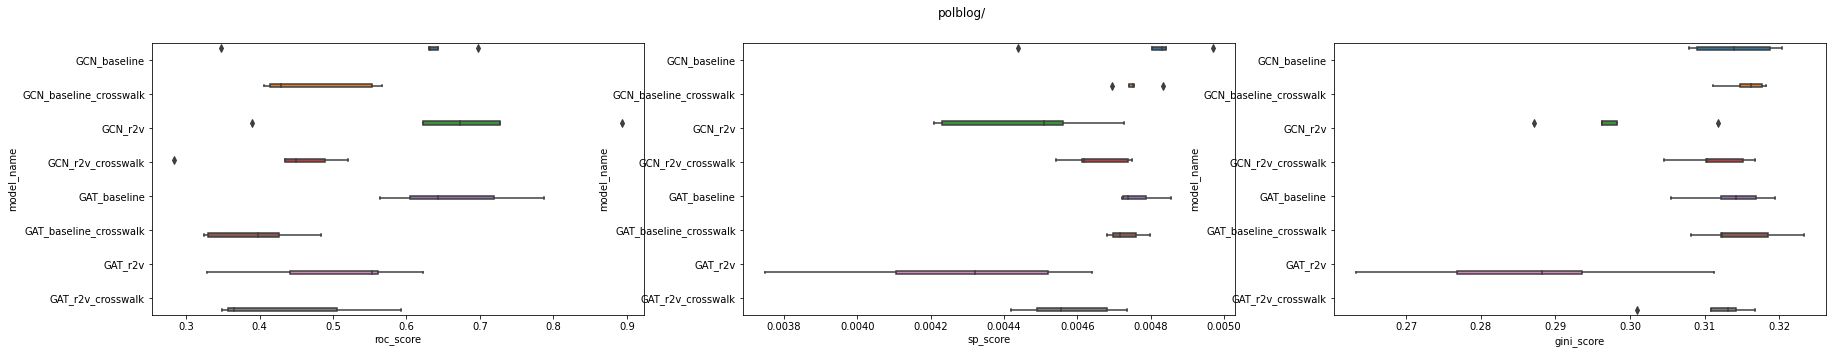

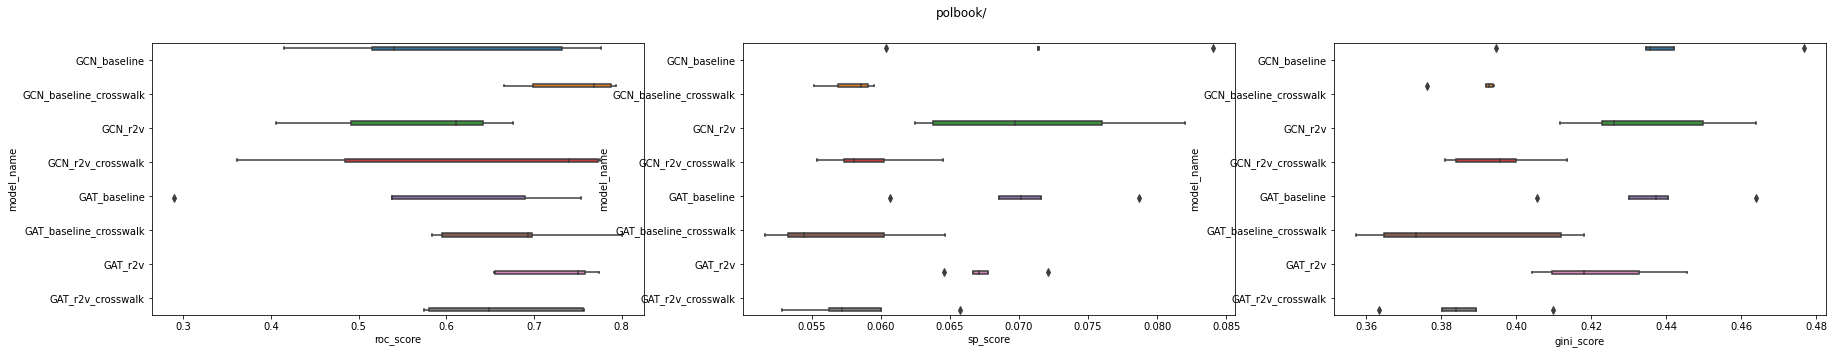

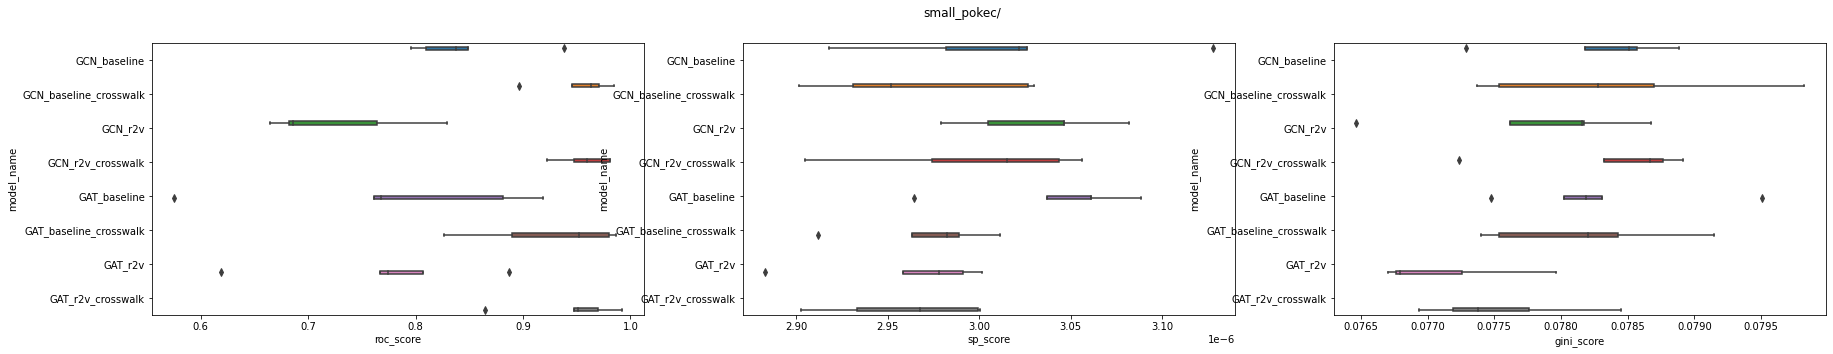

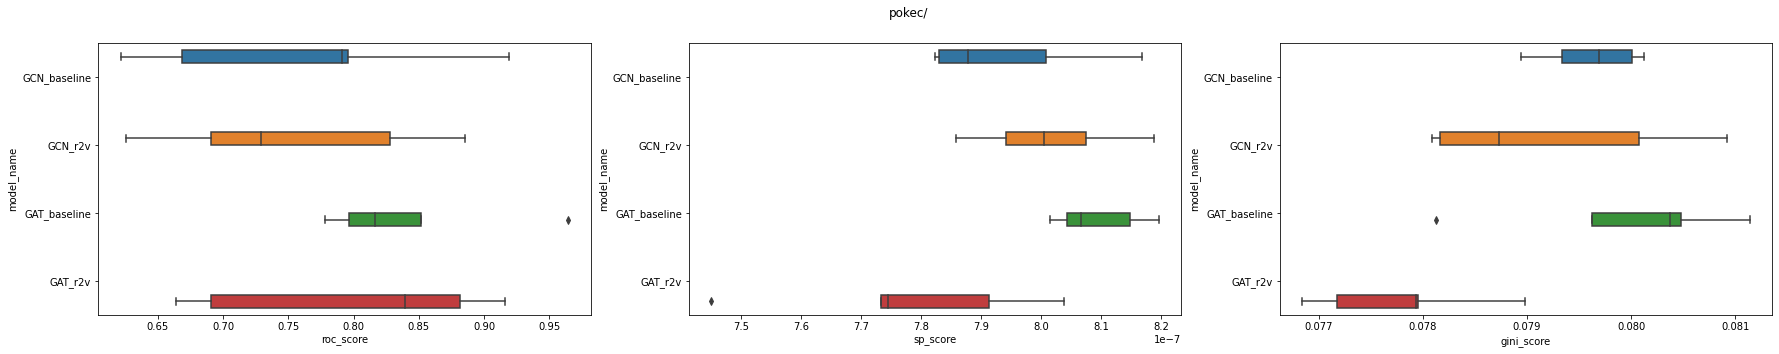

In [8]:
# box plots
for dataset in DATASETS:
    n_metrics = len(METRICS)
    f, axes = plt.subplots(1, n_metrics, figsize=(30, 5) )
    f.suptitle(dataset)
    
    for idx, metric in enumerate(METRICS):
        file = DATA_ROOT + dataset + metric + '.pkl'
        df = pd.DataFrame()
        
        m_dict = pkl.load(open(file, 'rb'))
        for m in list(m_dict.keys()):
            if 'word2vec' in m.lower():
                m_dict.pop(m)
        samples = 5
        df['model_name'] = np.repeat(list(m_dict.keys()), samples)
        df[metric] = np.concatenate(list(m_dict.values()))
        sns.boxplot(ax=axes[idx], data=df, x=metric, y='model_name', hue='model_name',)
        axes[idx].get_legend().remove()
    plt.show()

# investigating node2vec embeddings for small pokec

## 

In [9]:
# ## crosswalk embeddings
# cross_embs = np.load('../../../final_results/airport/data_one/airport_crosswalk_node2vec.npy')
# embs = np.load('../../../final_results/airport/data_one/airport_node2vec.npy')
# cross_embs.shape, embs.shape

In [10]:
# from utils import snakemake_utils
# d = snakemake_utils.get_dataset("airport").get_grouped_col()

In [11]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# pcr = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
# x = pcr.fit_transform(cross_embs, d.numpy())
# x.shape

In [12]:
# sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=d.numpy(), palette="tab10")